# # <span style="color:red">Importing the processed data to Postgresql Database</span>

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import exc
from sqlalchemy import inspect
import seaborn as sns
import matplotlib.pyplot as plt

<span style="color:blue">The below code is to connect database</span>

In [2]:
# My database connection details.
dbname = "dap_project"
user = "postgres"
password = "postgres"
host = "localhost"


# Connecting to my database.
conn = psycopg2.connect(database=dbname,
                        user=user,
                        password=password,
                        host=host)

print("connection successfull")

connection successfull


<span style="color:blue"> The below code is to load the data from the database</span>

In [3]:
# Function to extract data from PostgreSQL table and load it into a DataFrame
try:
    conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host)
    query = 'SELECT * FROM nypd_arrest_data'
    df_from_postgresdb = pd.read_sql(query, conn)
    
    print("Data loaded from PostgreSQL to DataFrame successfully!")
except Exception as e:
    print("Error loading data from PostgreSQL to DataFrame:", e)

Data loaded from PostgreSQL to DataFrame successfully!


/var/folders/pp/93wc99kj26b3hg5_2y8sxlpm0000gn/T/ipykernel_60489/46277063.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_from_postgresdb = pd.read_sql(query, conn)


In [4]:
df_from_postgresdb.head()

,pd_decription,offense_decription,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,community_districts,borough_boundaries,city_council_districts,police_precincts,zip_codes
0,JOSTLING,JOSTLING,Q,110,1,25-44,M,BLACK,67,3,21,68,14510
1,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,K,69,0,25-44,M,BLACK,5,2,25,42,13827
2,STRANGULATION 1ST,FELONY ASSAULT,K,61,0,65+,M,WHITE,32,2,15,36,18183
3,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,28,0,45-64,M,BLACK,18,4,36,18,12424
4,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,K,76,0,45-64,M,BLACK,68,2,38,54,16865


# <span style="color:red">Data Visualization</span>

<span style="color:blue">The below code is for a bar chart that uses information from this dataset to display the number of offenses per borough</span>


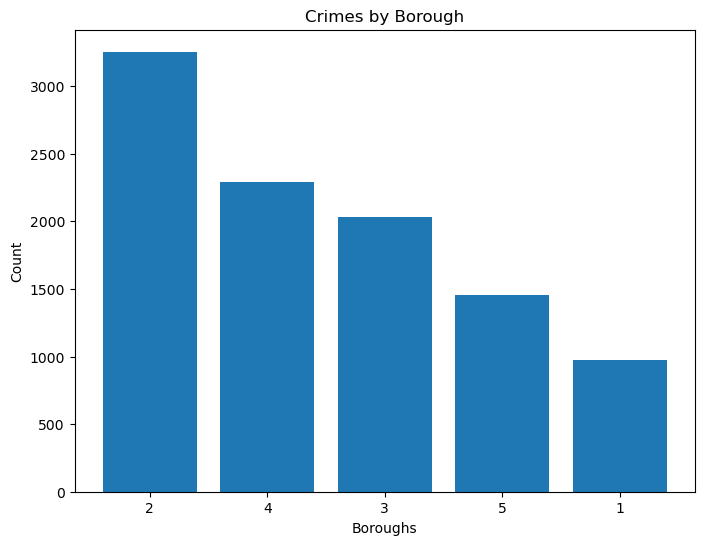

In [5]:
import matplotlib.pyplot as plt

# Count records by borough
borough_counts = df_from_postgresdb['borough_boundaries'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(borough_counts.index, borough_counts.values)
plt.xlabel('Boroughs')
plt.ylabel('Count')
plt.title('Crimes by Borough')
plt.show()

<span style="color:blue">The below code is for a bar chart using seaborn and matplotlib libraries to display the top 10 most frequent offense descriptions and labels the chart with a title and axes labels</span>

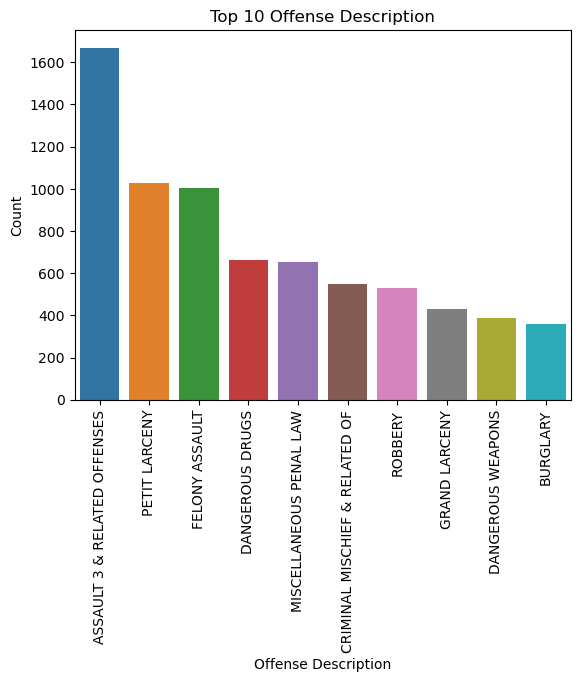

In [6]:
# Top 10 Offense Description
import seaborn as sns
import matplotlib.pyplot as plt
top_10_offense = df_from_postgresdb['offense_decription'].value_counts().nlargest(10)
sns.barplot(x=top_10_offense.index, y=top_10_offense.values)
plt.title("Top 10 Offense Description")
plt.xlabel("Offense Description")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<span style="color:blue">The below code is for a pie chart for the count of arrests by age group , with percentage labels and a title</span>

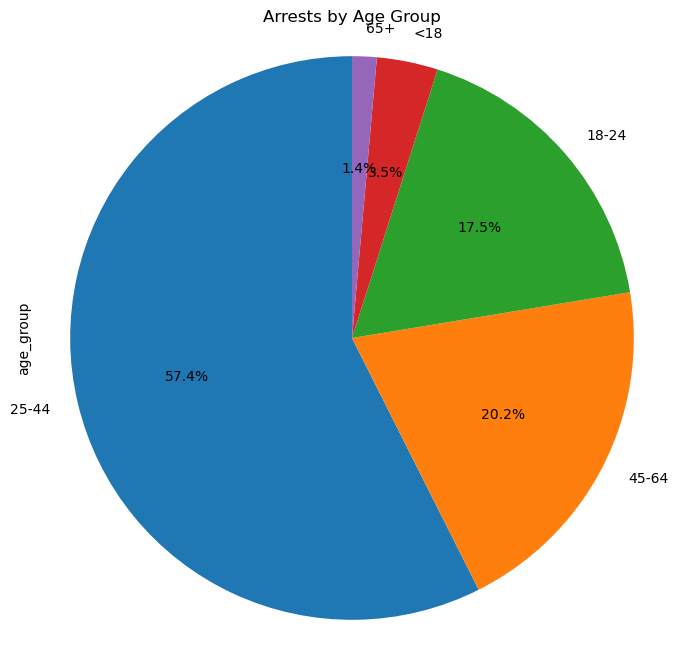

In [7]:
plt.figure(figsize=(8, 8))
df_from_postgresdb["age_group"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Arrests by Age Group")
plt.axis("equal")
plt.show()